# Plotando gráficos 3D

## Gráficos lineares

In [1]:
# Importação de bibliotecas
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### Instalando o Matplotlib 3.0.1 para manter a sanidade

In [2]:
# uninstall matplotlib
# !pip uninstall matplotlib -y

# install lasted version, only for Python 3
# !pip install matplotlib==3.0.1

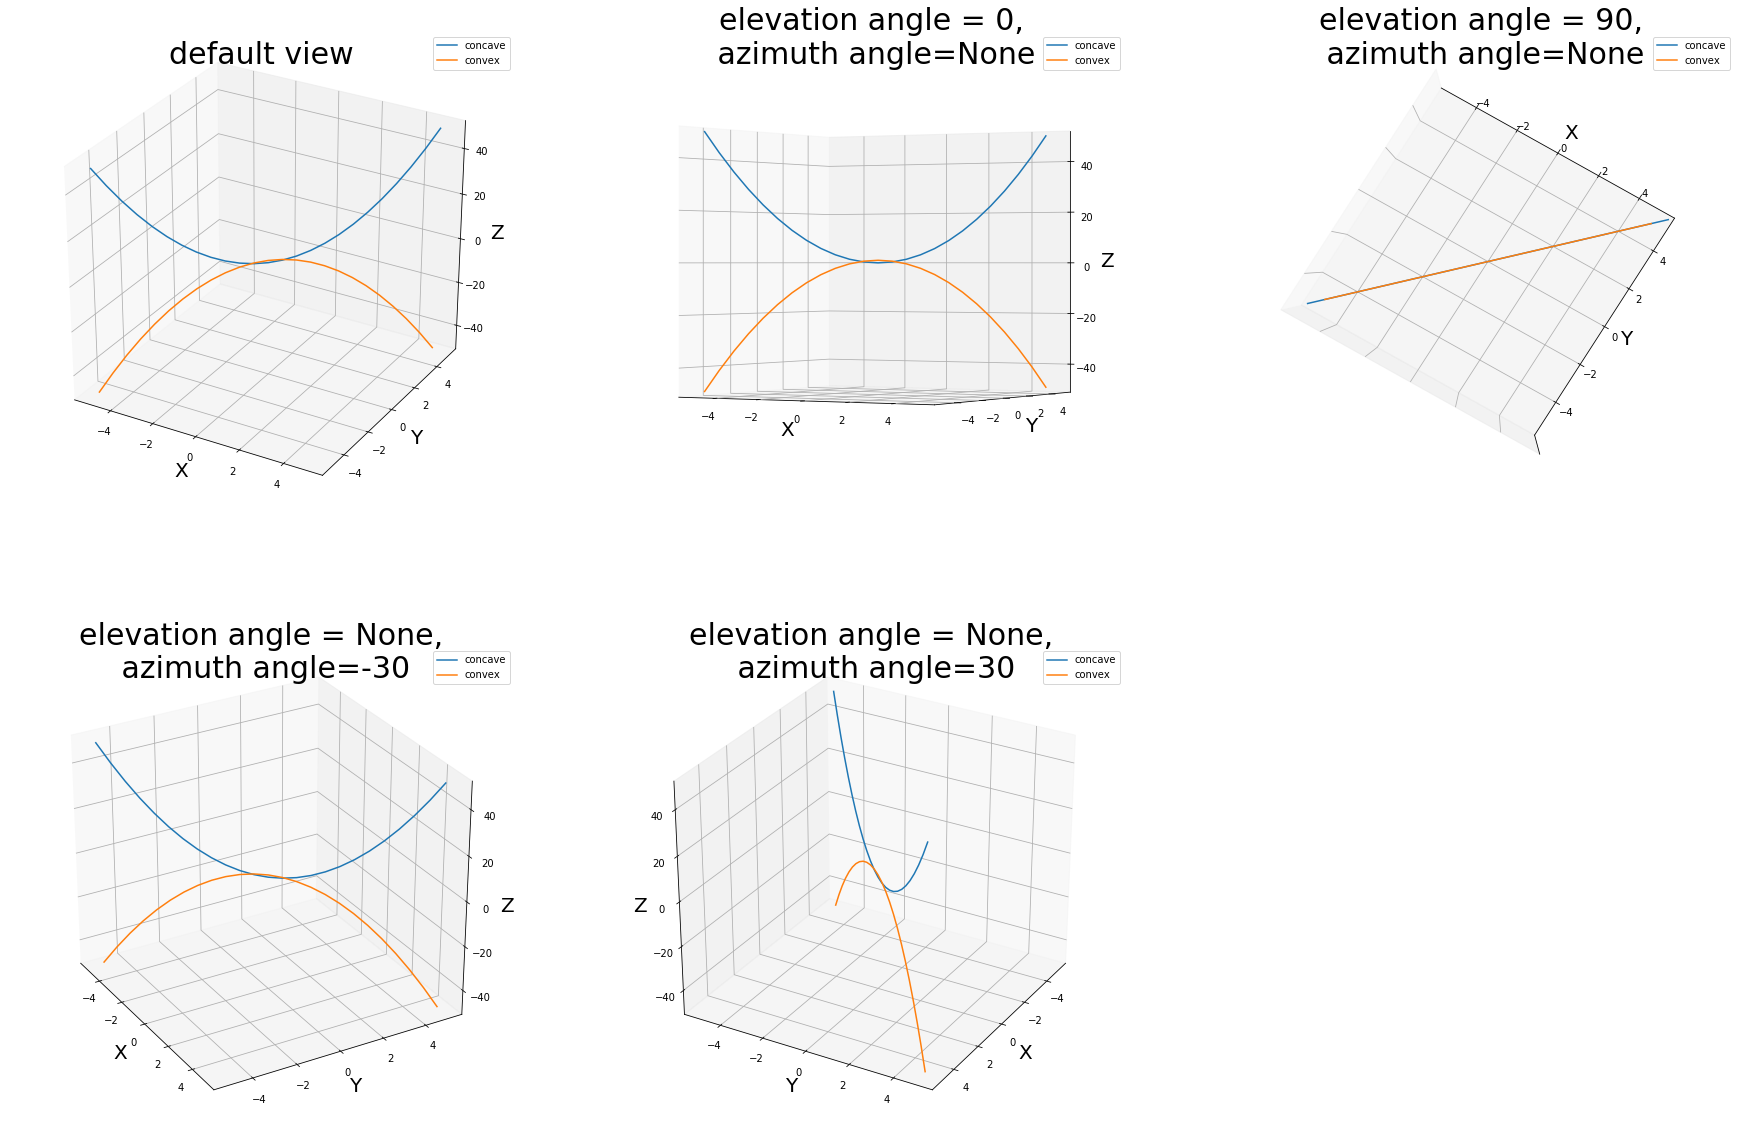

In [3]:
# Criação de variáveis
x = np.linspace(-5, 5, 25)
y = np.linspace(-5, 5, 25)
z = x**2 + y**2
z1 = 1 - (x**2 + y**2)

# Detalhes das figuras e dos eixos
fig = plt.figure(figsize=(30,20))
ax1 = fig.add_subplot(231, projection='3d') # rows=2, columns=3, index=1
plt.subplots_adjust(left=0.1, right=0.9, wspace=0.2, hspace=0.3)  #added for 3.0

# Função de plotagem
def plot_graph(axes, xlabel, ylabel, zlabel, title, elevation, rotation):
    axes.plot3D(x, y, z, label='concave')
    axes.plot(x, y, z1, label='convex')
    axes.view_init(elev=elevation, azim=rotation)
    axes.set_xlabel(xlabel, fontsize=20)
    axes.set_ylabel(ylabel, fontsize=20)
    axes.set_zlabel(zlabel, fontsize=20)
    axes.set_title(title, fontsize=30)
    axes.legend(loc='best')

# Chamando a função com as labels e ax1
plot_graph(ax1, 'X', 'Y', 'Z', 'default view', None, None)


ax2 = fig.add_subplot(232, projection='3d')
plot_graph(ax2, 'X', 'Y', 'Z', 'elevation angle = 0,\n azimuth angle=None', 0, None)

ax3 = fig.add_subplot(233, projection='3d')
plot_graph(ax3, 'X', 'Y', ' ', 'elevation angle = 90,\n azimuth angle=None', 90, None)
ax3.set_zticks([])

ax4 = fig.add_subplot(234, projection='3d')
plot_graph(ax4, 'X', 'Y', 'Z', 'elevation angle = None,\n azimuth angle=-30', None, -30)

ax5 = fig.add_subplot(235, projection='3d')
plot_graph(ax5, 'X', 'Y', 'Z', 'elevation angle = None,\n azimuth angle=30', None, 30)

#plt.tight_layout(w_pad=5)     # Commented for 3.0
plt.show()

## Gráfico de dispersão

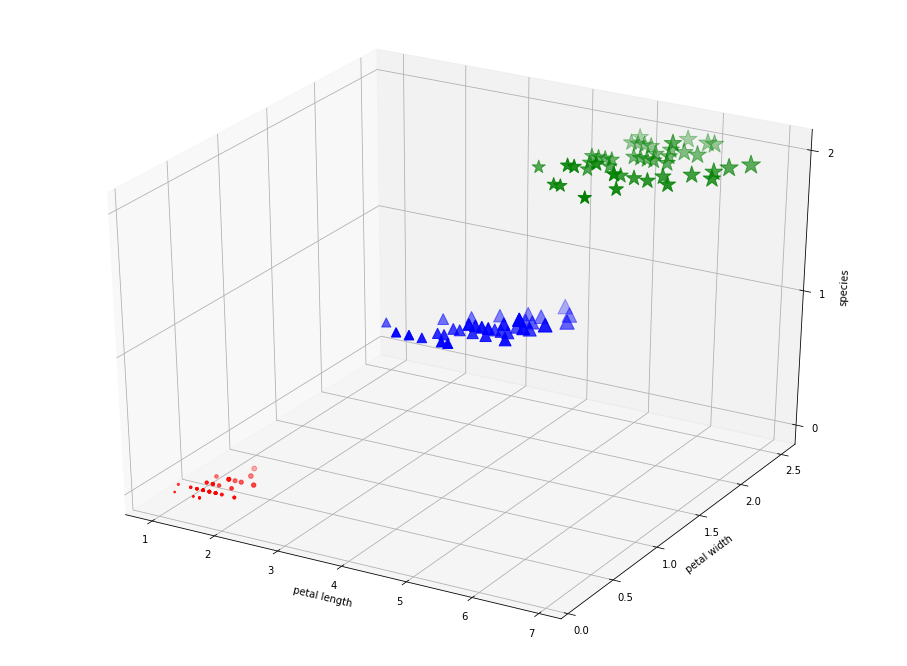

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

iris = pd.read_csv('../2-BasicPlots/data/iris_dataset.csv', delimiter=',')
iris['species'] = iris['species'].map({"setosa" : 0, "versicolor" : 1, "virginica" : 2})
x, y, z = iris['petal_length'],  iris['petal_width'], iris['species']

fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111, projection='3d')

for name, c, marker in zip((0, 1, 2), ('r', 'b', 'g'), ('o', '^', '*')):
    index = iris['species'] == name
    ax.scatter(x[index], y[index], z[index], s=25*x[index]*y[index], c=c, marker=marker)

ax.set_xlabel('petal length')
ax.set_ylabel('petal width')
ax.set_zlabel('species')
ax.set_zticks([0, 1, 2])


plt.show();

## Gráfico de barras

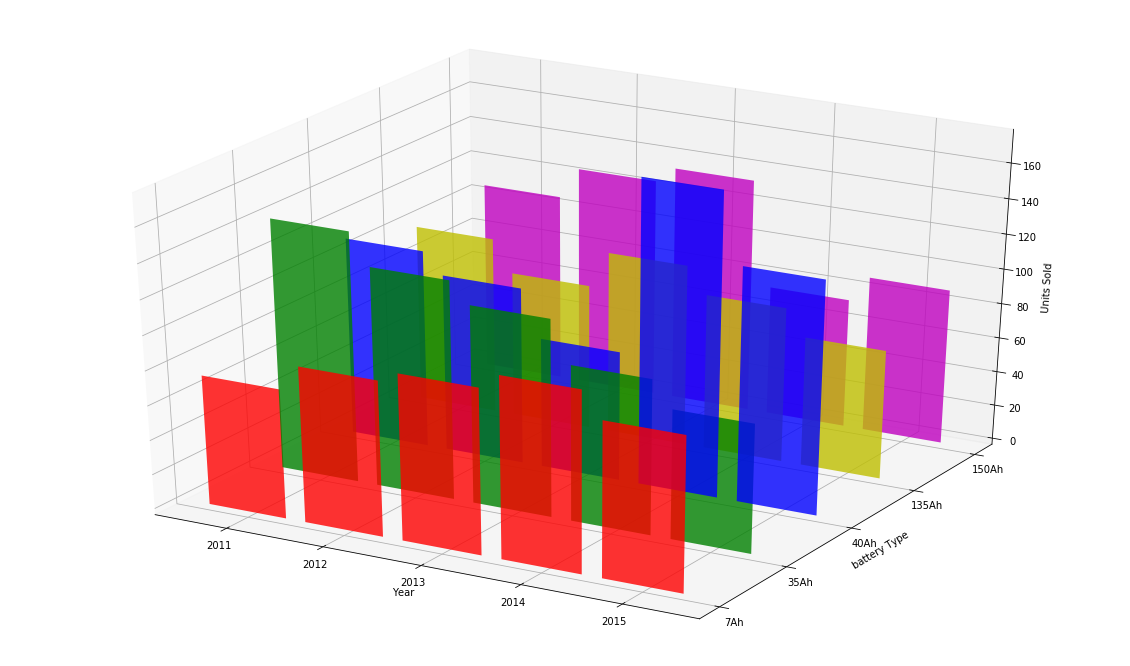

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(20,12))
ax = fig.add_subplot(111, projection='3d')

# Years for which we have battery sales data
x = [2011, 2012, 2013, 2014, 2015]

# Repeat X 5 times to represent each of the 5 battery ratings
X = x * 5

battery_ratings = ['7Ah', '35Ah', '40Ah', '135Ah', '150Ah']

# Number of units sold each year, each rating. e.g. 75 units of 7Ah batteris sold in 2011
Y =   np.array([[75, 144, 114, 102, 108],
        [90, 126, 102,  84, 126],
        [96, 114,  75, 105, 135],
        [105, 90, 175,  90,  75],
        [90,  75, 135,  75,  90]])

# Represent battery rating in numeric codes
yticks = [0, 1, 2, 3, 4] 
# Use different color for each of the battery ratings
colors = ['r', 'g', 'b', 'y', 'm']

i=0
for c, k in zip(colors, yticks):
    cs = [c] * len(X)
    ax.bar(X[i:i+5], Y[:,int(i/5)], zs=k, zdir='y', color=cs, alpha=0.8)
    i += 5

ax.set_yticks(yticks)
ax.set_yticklabels(battery_ratings)
ax.set_xlabel('Year')
ax.set_ylabel('battery Type')
ax.set_zlabel('Units Sold')

plt.show()

## Gráfico de poligonos

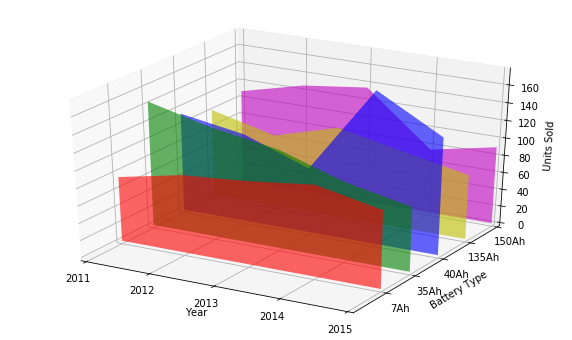

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import PolyCollection
from matplotlib.ticker import MultipleLocator

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')

# Represent years in rows in the table
X = [2011, 2012, 2013, 2014, 2015]
xs = X * 5

battery_ratings = ['7Ah', '35Ah', '40Ah', '135Ah', '150Ah']

# Number of units sold each year, each rating. e.g. 75 units of 7Ah batteris sold in 2011
Y =   np.array([[75, 144, 114, 102, 108],
        [90, 126, 102,  84, 126],
        [96, 114,  75, 105, 135],
        [105, 90, 175,  90,  75],
        [90,  75, 135,  75,  90]])

colors = ['r', 'g', 'b', 'y', 'm']
yticks = [0, 1, 2, 3, 4] 

vertices = []
for i in np.arange(0, 25, 5):
    vertices.append([(xs[i], 0.)] + list(zip(xs[i:i+5], Y[:,int(i/5)])) + [(xs[i+4], 0.)])

poly = PolyCollection(vertices, facecolors=['r', 'g', 'b', 'y', 'm'], alpha=0.6)
ax.add_collection3d(poly, zs=yticks, zdir='y')

majorLocator = MultipleLocator(1)
ax.xaxis.set_major_locator(majorLocator)

ax.set_xlim(2011, 2015)
ax.set_ylim(-1,4)
ax.set_zlim(0,175)

ax.set_yticks(yticks)
ax.set_yticklabels(battery_ratings)
ax.set_xlabel('Year')
ax.set_ylabel('Battery Type')
ax.set_zlabel('Units Sold')

plt.show()

## Gŕafico de contorno

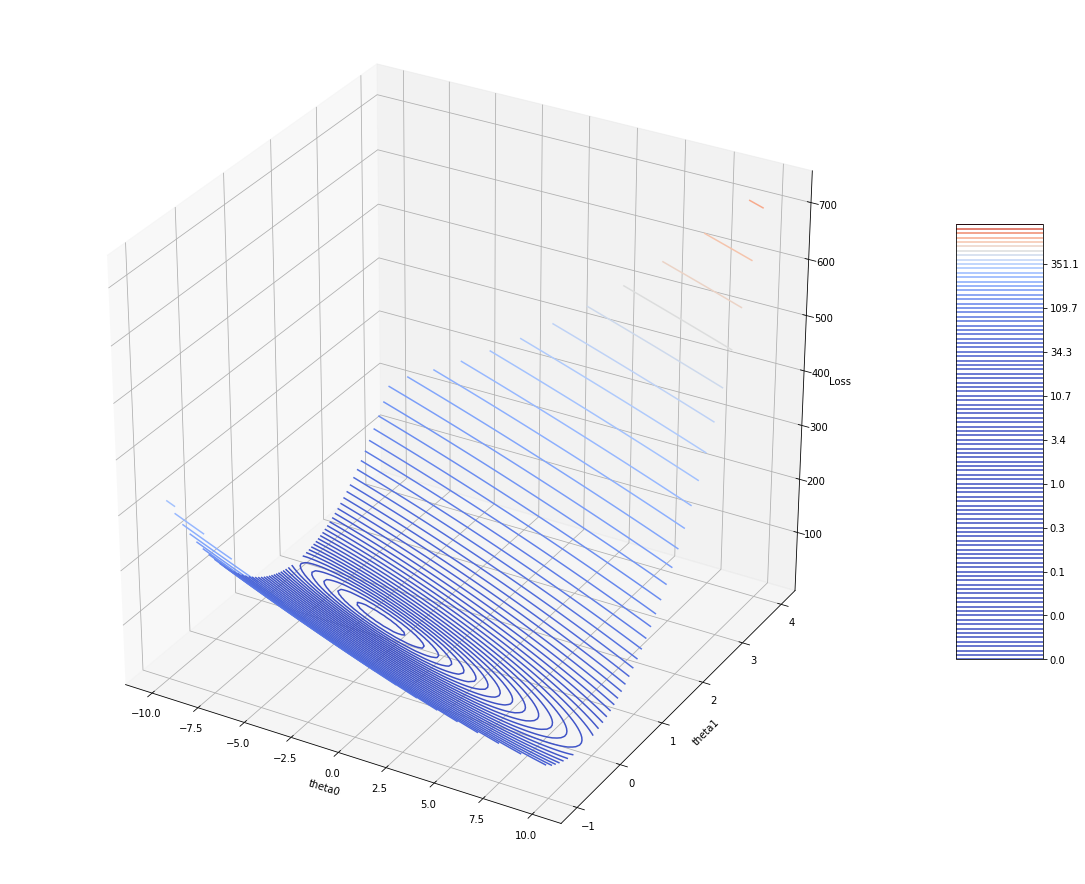

In [7]:
%matplotlib inline

from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib import cm

fig = plt.figure(figsize=(20,16))
ax = fig.gca(projection='3d')

# Read Loss, theta0 and theta1 values
Loss = pd.read_excel('../2-BasicPlots/data/Loss.xlsx')
theta0_vals = pd.read_excel('../2-BasicPlots/data/theta0.xlsx')
theta1_vals = pd.read_excel('../2-BasicPlots/data/theta1.xlsx')

X, Y = np.meshgrid(theta0_vals, theta1_vals)
# Plot contour curves
cset = ax.contour(X, Y, Loss, np.logspace(-2,3,100), cmap=cm.coolwarm) # em escala logaritimica 
                                # start = -2, stop = 3, number_samples=100

fig.colorbar(cset, shrink=0.5, aspect=5)

ax.set_xlabel('theta0')
ax.set_ylabel('theta1')
ax.set_zlabel('Loss')

plt.show()

### Meshgrid

In [30]:
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.meshgrid.html

In [8]:
nx, ny = (3, 2)
x = np.linspace(0, 1, nx)
y = np.linspace(0, 1, ny)
print('x', list(x))
print('y', list(y))

x [0.0, 0.5, 1.0]
y [0.0, 1.0]


In [9]:
xv, yv = np.meshgrid(x, y)

In [10]:
xv

array([[0. , 0.5, 1. ],
       [0. , 0.5, 1. ]])

In [11]:
yv

array([[0., 0., 0.],
       [1., 1., 1.]])

In [12]:
xv, yv = np.meshgrid(x, y, sparse=True)  # make sparse output arrays

In [13]:
xv

array([[0. , 0.5, 1. ]])

In [14]:
yv

array([[0.],
       [1.]])

### Contorno

In [15]:
x = np.arange(-5, 5, 0.1) # start, stop, step
y = np.arange(-5, 5, 0.1)

In [16]:
xx, yy = np.meshgrid(x, y, sparse=True)

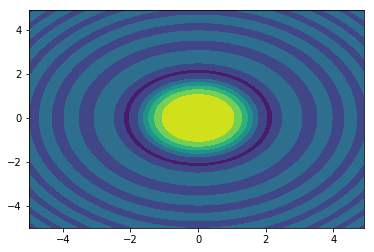

In [17]:
z = np.sin(xx**2 + yy**2) / (xx**2 + yy**2)
h = plt.contourf(x,y,z)
plt.show()

## Gráfico de superficie

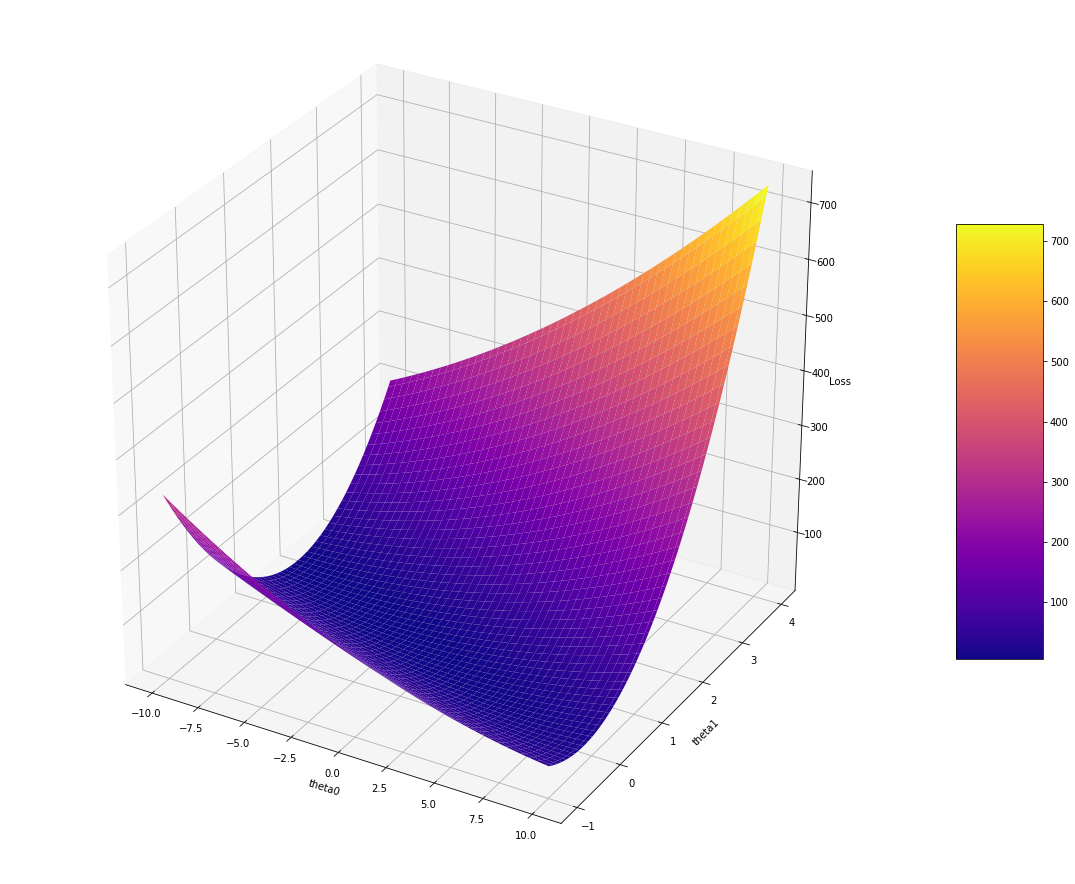

In [18]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

fig = plt.figure(figsize=(20,16))
ax = fig.gca(projection='3d')

# Read Loss, theta0 and theta1 values
Loss = pd.read_excel('../2-BasicPlots/data/Loss.xlsx')
theta0_vals = pd.read_excel('../2-BasicPlots/data/theta0.xlsx')
theta1_vals = pd.read_excel('../2-BasicPlots/data/theta1.xlsx')

X, Y = np.meshgrid(theta0_vals, theta1_vals)

# Plot surface graph
surf = ax.plot_surface(X, Y, Loss, cmap='plasma')
fig.colorbar(surf, shrink=0.5, aspect=5)

ax.set_xlabel('theta0')
ax.set_ylabel('theta1')
ax.set_zlabel('Loss')

plt.show()

## Gráfico arame

In [20]:
import matplotlib
matplotlib.use('Qt5Agg')

/home/rodrigo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: matplotlib.pyplot as already been imported, this call will have no effect.
  


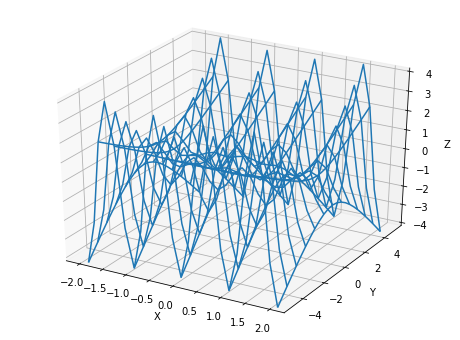

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

x = np.linspace(-2, 2, 25)
y = np.linspace(-5, 5, 25)
X, Y = np.meshgrid(x, y)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# set limits for Z axis so that they don't keep changing while the animation is running
ax.set_zlim(-4, 4)

wframe = None
for phi in np.linspace(0, 90, 100):
    if wframe:
        ax.collections.remove(wframe)
    Z = np.cos(2 * np.pi * X + phi) * (1 - np.sqrt(X**2 + Y**2))
    #Z = np.cos(2 * np.pi * X * phi) 
    wframe = ax.plot_wireframe(X, Y, Z, rstride=2, cstride=2)
    plt.pause(0.1)

plt.show()

## Superficie triangular 

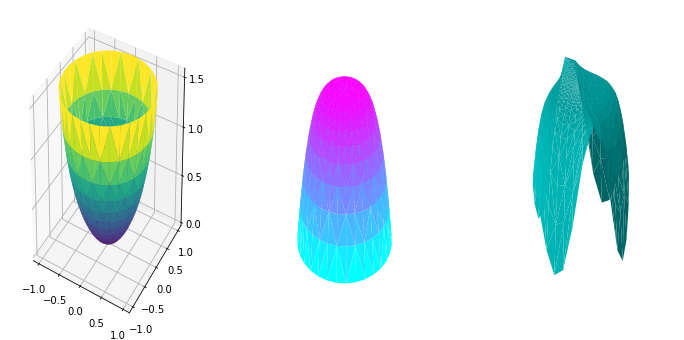

In [22]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

# Define number of radii and angles
n_radii = 16
n_angles = 32

# Make radii and angles arrays.
radii = np.linspace(0., 1.0, n_radii)
angles = np.linspace(0, 2*np.pi, n_angles)

# Repeat all angles for each radius.
angles = np.repeat(angles[..., np.newaxis], n_radii, axis=1)

# Convert polar (radii, angles) coords to cartesian (x, y) coords.
x = (radii*np.cos(angles)).flatten()
y = (radii*np.sin(angles)).flatten()

# Compute z to make the triangle surface.
z = np.tan(x**2 + y**2)
z1 = np.cos(x**2 + y**2)
z2 = np.cos(x**3 + y**3) 

fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(131, projection='3d')
ax1.plot_trisurf(x, y, z, linewidth=0.5, cmap='viridis')

ax2 = fig.add_subplot(132, projection='3d')
ax2.plot_trisurf(x, y, z1, linewidth=0.5, cmap='cool')
plt.axis('off')

ax3 = fig.add_subplot(133, projection='3d')
ax3.plot_trisurf(x, y, z2, linewidth=0.5, color='c')
plt.axis('off')

plt.show()

## Dados 2D em gráficos 3D

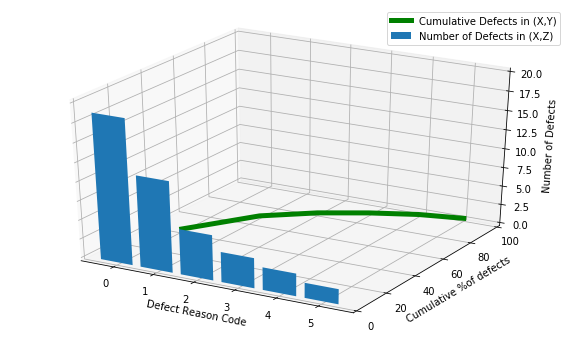

In [24]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')

x = [0, 1, 2, 3, 4, 5]
y = [19, 12, 6, 4, 3, 2]
ax.bar(x, y, zs=0, zdir='y', label='Number of Defects in (X,Z)')

x = [0, 1, 2, 3, 4, 5]
y = [41, 67, 80, 89, 96, 100]
ax.plot(x, y, zs=0, zdir='z', color='g', lw=5, label='Cumulative Defects in (X,Y)')

ax.set_ylim(0,100)
ax.set_zlim(0,20)

ax.set_xlabel('Defect Reason Code')
ax.set_ylabel('Cumulative %of defects')
ax.set_zlabel('Number of Defects')
ax.legend(loc='best')

plt.show()

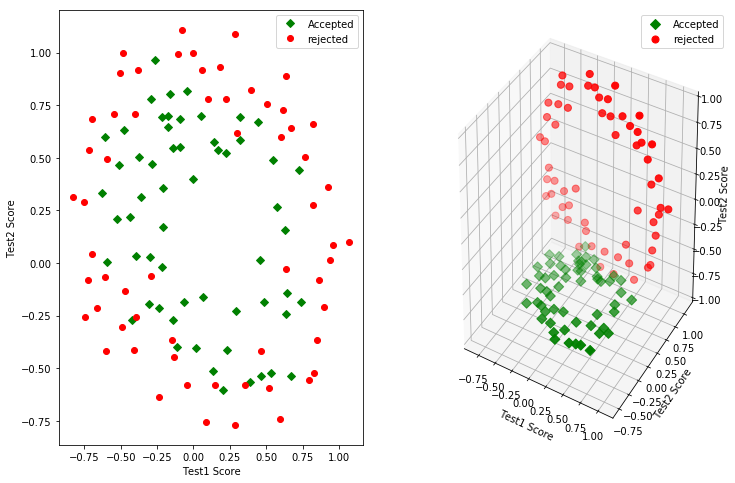

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Read the Data, two product test scores, and result 1 means accepted and 0 means rejected
scores_data = pd.read_csv('test_scores_results.txt',header=None)

# Add columns labels to the data
columns = ['Test1_Score', 'Test2_Score', 'Accepted']
scores_data = np.array(scores_data)
df = pd.DataFrame(data=scores_data, columns=columns)

# Separate Accepted and Rejected cases
df_accepted = df[(df['Accepted'] == 1.0)]
df_rejected = df[(df['Accepted'] == 0.0)]

# split scores to x and y co-ordinates to be able to plot in 2D
accepted_score1 = np.array(df_accepted)[:,0]
accepted_score2 = np.array(df_accepted)[:,1]
rejected_score1 = np.array(df_rejected)[:,0]
rejected_score2 = np.array(df_rejected)[:,1]

# Plot the data for visualisation
fig = plt.figure(figsize=(12,8))

ax = fig.add_subplot(121)
ax.plot(accepted_score1, accepted_score2, 'gD', label='Accepted')
ax.plot(rejected_score1, rejected_score2, 'ro', label='rejected')

plt.xlabel('Test1 Score')
plt.ylabel('Test2 Score')
plt.legend(loc='best')

ax = fig.add_subplot(122, projection='3d')

ax.scatter(accepted_score1, accepted_score2, zs=-0.75, zdir='z', s=50, color='g', marker='D', label='Accepted')
ax.scatter(rejected_score1, rejected_score2, zs=0.75, zdir='y', s=50, color='r', marker='o', label='rejected')

ax.set_xlabel('Test1 Score')
ax.set_ylabel('Test2 Score')
ax.set_zlabel('Test2 Score')
ax.set_zlim(-1, 1)
ax.legend(loc='best')

plt.show()